<a href="https://colab.research.google.com/github/jsebastianquiroga/Big_Data_Derby_2022_SI/blob/main/Notebooks/Sistemas_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">




***Integrantes:***

**Joshep Andersson Blanco Reyes**

**Leonardo García Diaz**

**Juan Sebastián Quiroga Bernal**

# <img style="float: left; padding-right: 10px;" src="https://images7.alphacoders.com/671/671791.jpg"  height="300">




# Big Data Derby 2022

The goal of this competition is to analyze horse racing tactics, drafting strategies, and path efficiency. You will develop a model using never-before-released coordinate data along with basic race information.

Your work will help racing horse owners, trainers, and veterinarians better understand how equine performance and welfare fit together. With better data analysis, equine welfare could significantly improve.

https://www.kaggle.com/competitions/big-data-derby-2022/overview




## ***Paquetes de conexión***

In [38]:

# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
import pandas as pd
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

nyra_2019_complete = '1AAshxhslPjhxg-UC86f9Z97s3W81nayF' #<-- Key del file en drive (nyra_2019_complete.csv 610 mb)
# nyra_race_table    = '1KtYQEvt4pboSqs7bO6jfdCHADo9PMzo9'#<-- Key del file en drive (nyra_race_table.csv 93 kb)
# nyra_start_table   = '1LYUx_De3U7TBw6GgqRk6whVzMjuJjSaz'#<-- Key del file en drive (nyra_start_table.csv 722 Kb)
# nyra_tracking_table= '15y4AtfLiyop9FWdc0SRaMUs-jKgnOppl'#<-- Key del file en drive (nyra_tracking_table.csv 320,7 mb)


download = drive.CreateFile({'id': nyra_2019_complete}) 
# Download the file to a local disc
download.GetContentFile('nyra_2019_complete.csv')
dtype_dict = {"track_id": object ,
              "race_date" :object, #will be read with "parse_dates" parameter
              "race_number" : np.int8, 
              "program_number" : object,
              "trakus_index" : np.int16,  
              "latitude" : np.float64,
              "longitude" : np.float64,
              "distance_id" : np.int16,  
              "course_type" : object, 
              "track_condition" : object,
              "run_up_distance" : np.int8,  
              "race_type" : object, 
              "purse" : np.int32,  
              "post_time" : np.int16,  
              "weight_carried" : np.int16,  
              "jockey" : object, 
              "odds" : np.int16,
              "position_at_finish":np.int8
             }
nyra_2019 = pd.read_csv('nyra_2019_complete.csv', header=None,dtype=dtype_dict,parse_dates=[1])
nyra_2019.columns= dtype_dict.keys()


# download = drive.CreateFile({'id': nyra_race_table}) 
# # Download the file to a local disc
# download.GetContentFile('nyra_race_table.csv')
# nyra_race  = pd.read_csv("nyra_race_table.csv")
# nyra_race.head()

# download = drive.CreateFile({'id': nyra_start_table}) 
# # Download the file to a local disc
# download.GetContentFile('nyra_start_table.csv')
# nyra_start  = pd.read_csv("nyra_start_table.csv", header=None)



# download = drive.CreateFile({'id': nyra_start_table}) 
# # Download the file to a local disc
# download.GetContentFile('nyra_tracking_table.csv')
# nyra_tracking  = pd.read_csv("nyra_tracking_table.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
nyra_2019.info()
nyra_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   track_id            object        
 1   race_date           datetime64[ns]
 2   race_number         int64         
 3   program_number      object        
 4   trakus_index        int64         
 5   latitude            float64       
 6   longitude           float64       
 7   distance_id         int64         
 8   course_type         object        
 9   track_condition     object        
 10  run_up_distance     int64         
 11  race_type           object        
 12  purse               float64       
 13  post_time           int64         
 14  weight_carried      int64         
 15  jockey              object        
 16  odds                int64         
 17  position_at_finish  int64         
dtypes: datetime64[ns](1), float64(3), int64(8), object(6)
memory usage: 718.0+ MB


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


Se removerán las variables de trakus_index, latitude, longitude, ya que son información geolocalizada tomada durante la carrera, con el fin de predecir que caballo puede ganar antes de la carrera no tiene relación, ademas se creo una llave única para identificar cada carrera individualmente para un total de 2000 carreras.

In [34]:
nyra_2019 = nyra_2019.drop(['latitude', 'longitude', 'trakus_index'], axis=1)
nyra_2019['unique_id'] = nyra_2019.track_id.astype(str) + '_' + nyra_2019.race_date.astype(str) + '_' + nyra_2019.race_number.astype(str)
print(nyra_2019.unique_id.value_counts())
nyra_2019

SAR_2019-07-25_1    9862
BEL_2019-09-19_1    9558
SAR_2019-08-22_1    8280
SAR_2019-07-24_1    7542
AQU_2019-11-03_8    7248
                    ... 
BEL_2019-06-26_6     984
BEL_2019-06-14_5     980
AQU_2019-03-02_3     882
BEL_2019-06-21_6     840
BEL_2019-06-28_4     774
Name: unique_id, Length: 2000, dtype: int64


,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish,unique_id
0,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
1,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
2,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
3,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
4,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228425,AQU,2019-11-23,9,2,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9
5228426,AQU,2019-11-23,9,2,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9
5228427,AQU,2019-11-23,9,2,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9
5228428,AQU,2019-11-23,9,2,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9


In [36]:
nyra_2019['unique_id'].nunique()

2000

## ***EDA***

In [5]:
nyra_2019['track_id'].count()

5228430

In [6]:
nyra_2019['track_id'].value_counts(normalize=True) * 100

AQU    41.281398
BEL    37.241275
SAR    21.477327
Name: track_id, dtype: float64

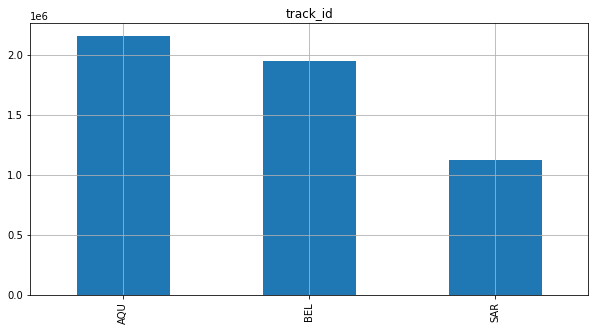

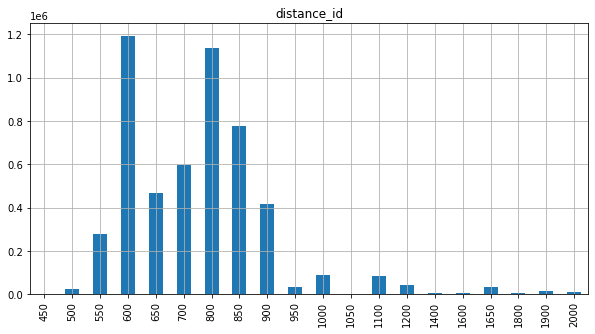

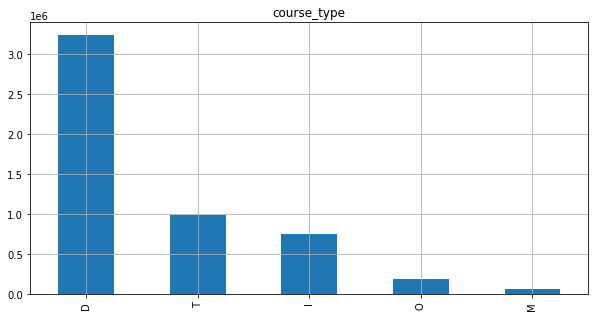

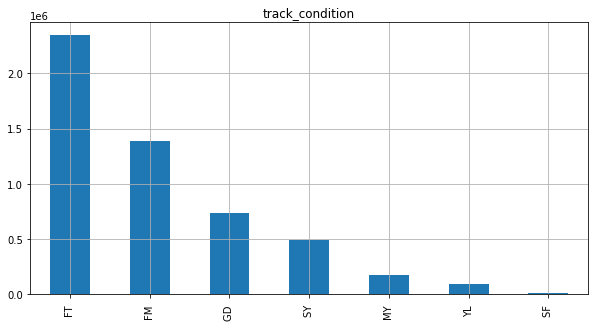

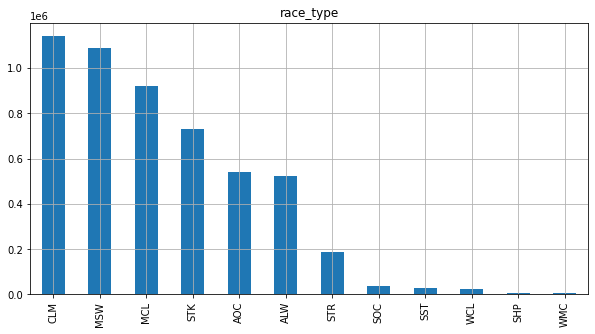

In [40]:
categorical_features = ['track_id','distance_id','course_type','track_condition','race_type']
for f in categorical_features:
    plt.figure(figsize=(10,5))
    if (f=='distance_id'):
        nyra_2019[f].value_counts().sort_index().plot(kind='bar')
    else:
        nyra_2019[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

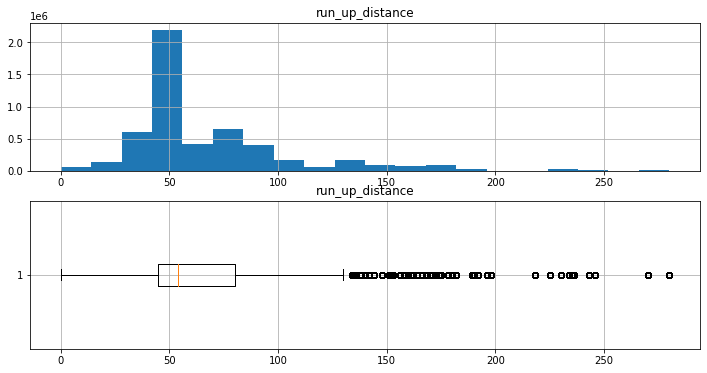

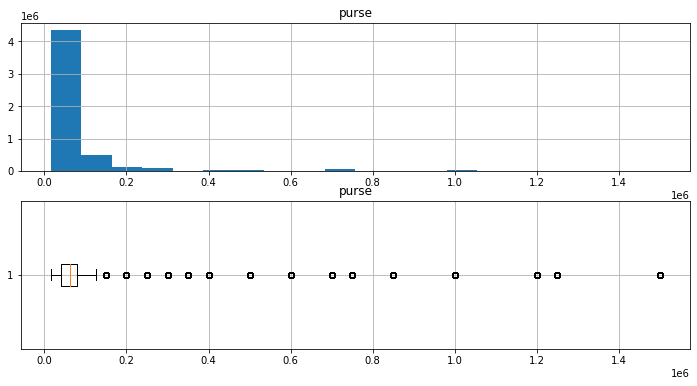

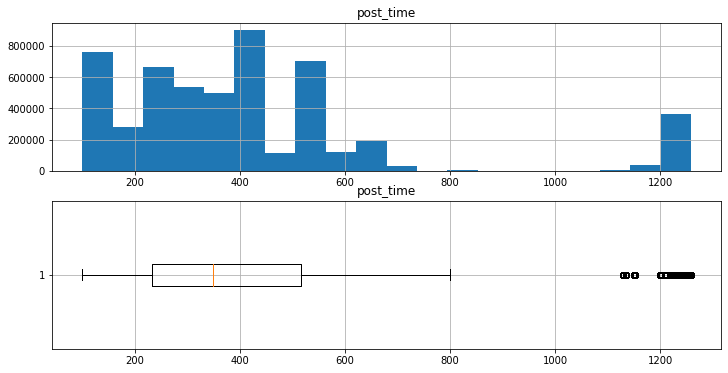

In [73]:
numerical_features = ['run_up_distance','purse','post_time']
for f in numerical_features:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6))
    
    ax1.hist(nyra_2019[f], bins=20)
    ax1.grid()
    ax1.set_title(f)
    
    ax2.boxplot(nyra_2019[f], vert=False)
    ax2.grid()   
    ax2.set_title(f)
    
    plt.show()
    print('')

Text(0.5, 1.0, 'Pearson Correlation')

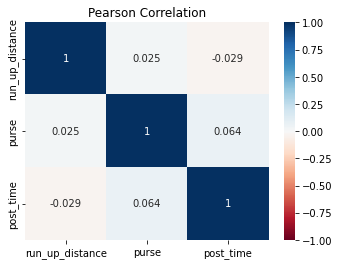

In [95]:
corr_pearson = nyra_2019[numerical_features].corr(method='pearson')
plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap='RdBu', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')

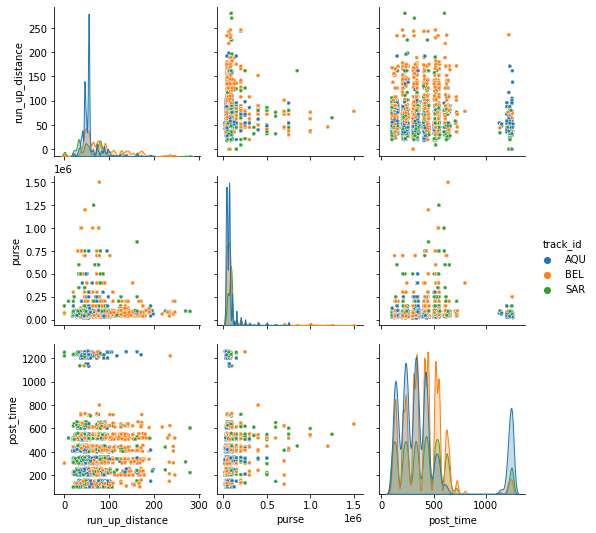

In [87]:
sns.pairplot(nyra_2019, vars=numerical_features,
             hue='track_id',
             plot_kws= {'s' : 10, 'alpha' : 0.5})
plt.show()

### ***Comparativo variables vs variable de respuesta (position_at_finish)***

In [96]:
pd.crosstab(index=nyra_2019['track_id'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
track_id,,,,,,,,,,,,,,
AQU,41.074523,41.055014,41.210951,41.074499,41.270581,41.376351,40.882829,40.939100,42.108816,41.957114,45.934234,45.664133,80.263158,45.428973
BEL,38.546241,38.650085,38.426585,38.372872,38.331962,36.844723,35.075135,34.131448,31.647734,31.456172,32.592104,34.082742,19.736842,54.571027
SAR,20.379235,20.294900,20.362465,20.552629,20.397456,21.778926,24.042036,24.929453,26.243450,26.586714,21.473662,20.253124,0.000000,0.000000


In [97]:
s =pd.crosstab(index=nyra_2019['track_id'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=1)
s

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
track_id,,,,,,,,,,,,,,
AQU,13.385246,13.386497,13.404195,13.301942,13.040402,11.368538,8.347044,5.780569,3.902067,2.124984,1.193447,0.665317,0.084786,0.014965
BEL,13.924055,13.969506,13.854465,13.775169,13.425835,11.221672,7.938180,5.342159,3.250829,1.765980,0.938662,0.550450,0.023111,0.019927
SAR,12.764855,12.719260,12.730124,12.793352,12.387982,11.501727,9.434896,6.765800,4.674302,2.588147,1.072376,0.567178,0.000000,0.000000


Se obtienen las distribuciones de los tacks ID, el 41% del total de los datos tienen relación con el track id AQU.

Se identifica que en la posisión 13 el 80% de las observaciones tienen relación con ese track ID.

Inicialmente en Saratoga, se identifiarón datos hasta las pocisiones 12, puede ser que en esta pista corran menos caballos en total.

Se observa una decrecimiento porcentual en la cantidad de observaciones, en las posiones 13 y 14.

In [98]:
x = pd.crosstab(index=nyra_2019['race_date'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)

x

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
race_date,,,,,,,,,,,,,,
2019-01-01,0.428797,0.428553,0.429613,0.431482,0.442237,0.455287,0.423669,0.189001,0.148494,0.000000,0.000000,0.000000,0.000000,0.0
2019-01-04,0.421546,0.421307,0.422348,0.424186,0.434759,0.499973,0.232371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2019-01-05,0.470312,0.470045,0.471207,0.473257,0.485053,0.557811,0.402111,0.324518,0.138994,0.000000,0.000000,0.000000,0.000000,0.0
2019-01-06,0.394391,0.394167,0.395141,0.382697,0.295460,0.291215,0.251433,0.363565,0.170493,0.000000,0.000000,0.000000,0.000000,0.0
2019-01-10,0.267003,0.266851,0.267511,0.268675,0.275372,0.240965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-22,0.481259,0.480986,0.482175,0.484273,0.496344,0.570796,0.526012,0.438050,0.514479,0.591873,0.570634,1.017585,14.035088,0.0
2019-12-28,0.439318,0.439068,0.440154,0.442069,0.453088,0.521051,0.466331,0.545675,0.679473,0.937666,1.827811,3.259452,13.070175,0.0
2019-12-29,0.491638,0.491359,0.492574,0.494717,0.507048,0.456805,0.614740,0.650020,0.816967,1.122455,0.722208,0.000000,0.000000,0.0


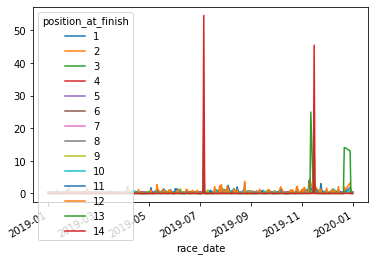

In [99]:
x.plot()

Se evidencia un incremento en 3 fechas especificas de la existencia de los puntos 13 y 14. pareceria ser un comportamiento atipico.

In [100]:
nyra_2019['race_number'].value_counts(normalize=True) * 100

8     11.139348
6     11.001716
5     10.708454
7     10.607831
4     10.019184
2      9.852193
1      9.731564
9      9.427591
3      9.376735
10     5.415412
11     1.889745
12     0.606779
13     0.223451
Name: race_number, dtype: float64

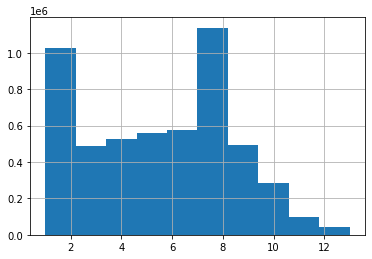

In [101]:
nyra_2019['race_number'].hist()

In [102]:
xp = pd.crosstab(index=nyra_2019['race_number'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
xp

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
race_number,,,,,,,,,,,,,,
1,11.245545,11.385793,11.119943,11.369613,11.193908,9.227158,7.148595,5.226080,4.203832,2.743473,2.505439,2.362706,0.000000,0.000000
2,10.590691,10.584671,10.724801,10.539267,10.645657,9.874341,8.879126,7.182701,6.785229,6.423697,4.934199,5.202404,0.000000,0.000000
3,10.645286,10.639235,10.708278,10.568881,10.149460,8.994793,7.171061,6.174039,5.253790,4.471522,3.841078,2.954177,0.000000,0.000000
4,10.585857,10.579840,10.606002,10.483186,10.557386,10.317318,10.275623,9.263683,6.536739,4.734069,2.243304,3.157694,0.000000,0.000000
5,10.407570,10.401655,10.480793,10.474888,10.550348,11.230929,11.431353,12.125607,11.339046,9.021717,8.113699,9.733838,14.166667,45.428973
6,10.261273,10.344534,10.191488,10.339692,10.215591,11.210188,12.437085,13.211708,13.282469,13.881113,14.481615,15.966547,14.035088,0.000000
7,10.563678,10.683994,10.496320,10.631114,10.757097,11.049657,11.336725,10.480050,10.270589,9.483689,5.449552,6.687442,12.280702,0.000000
8,10.762721,10.649750,10.729644,10.816812,10.832465,11.437831,11.698217,12.367437,12.963981,11.776168,13.242270,10.671924,13.070175,0.000000
9,8.395523,8.192389,8.352385,8.254529,8.396494,9.315012,10.342112,11.787636,14.305428,16.830415,22.211919,17.705981,19.736842,54.571027


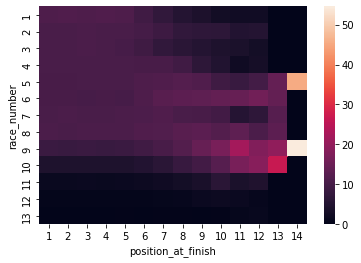

In [103]:
sns.heatmap(xp)

Se observan que en las carreras 5 y 9 solo se presentarón posiciones 14, y referente a la 13 solo se presentan datos de la carera 5-10 (solo el 38% de las occurrencias)

In [104]:
nyra_2019['program_number'].value_counts(normalize=True) * 100

3      7.352073
2      7.308561
4      7.281249
5      7.200498
1      7.156011
6      6.722094
7      5.674916
4      4.412434
8      4.408570
5      4.402717
6      4.369055
3      4.334513
1      4.319308
2      4.216830
7      3.637727
9      3.285365
8      2.729366
10     2.273551
9      1.812265
11     1.388218
10     1.299893
1A     1.085469
12     0.871562
11     0.859723
12     0.493341
13     0.317132
13     0.189847
14     0.149242
14     0.139200
15     0.081745
2B     0.078054
15     0.069677
16     0.039381
16     0.029301
3X     0.006388
1X     0.004724
Name: program_number, dtype: float64

In [105]:
xpp = pd.crosstab(index=nyra_2019['program_number'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
xpp

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
program_number,,,,,,,,,,,,,,
1,4.548860,4.565315,4.539427,4.879068,4.566069,4.213095,4.703250,2.868487,2.500400,3.103903,1.446200,2.982796,0.000000,0.000000
2,4.739089,4.612348,4.015515,5.519567,4.255066,4.044133,3.148813,3.469615,2.592896,3.112136,2.027533,2.330906,0.000000,0.000000
3,5.018177,4.297469,4.855939,4.383922,4.513429,4.081399,4.135030,4.068119,3.371365,1.817699,2.337815,2.251407,0.000000,0.000000
4,4.601465,5.201325,4.033036,4.674343,4.833230,3.643817,4.554160,3.283896,4.201832,3.954663,3.753700,4.022641,0.000000,0.000000
5,5.235703,3.776555,4.862206,4.108094,4.784109,4.672429,4.845986,3.689132,2.612396,2.797446,3.436285,2.531243,0.000000,0.000000
6,3.882632,5.364874,4.562218,4.273047,4.874726,4.394535,3.829815,3.995931,3.867345,2.891670,3.208032,1.322861,0.000000,0.000000
7,3.722118,2.846271,3.496162,3.399210,4.215623,4.349006,3.227783,4.146870,3.102376,4.544706,4.204858,0.944446,19.736842,0.000000
8,2.620269,2.966624,2.320139,2.492325,2.405911,2.773543,3.400927,3.380037,4.041338,1.846973,2.567852,0.000000,0.000000,0.000000
9,1.208195,1.343350,1.381856,1.622207,1.225537,1.911533,1.771831,4.215120,3.926843,4.134878,4.636399,1.396000,0.000000,0.000000


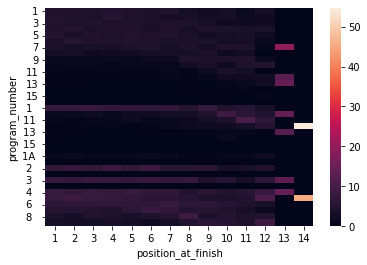

In [106]:
sns.heatmap(xpp)

Se observa que el numero de programa 4, tiene el 8% de observaciones que terminaron en la primera poción, mayor que el resto de obervaciones.

In [107]:
nyra_2019['distance_id'].value_counts(normalize=True) * 100

600     22.851066
800     21.762862
850     14.857845
700     11.388428
650      8.916443
900      7.963614
550      5.373812
1000     1.681977
1100     1.591740
1200     0.864753
950      0.684986
1650     0.649583
500      0.483319
1900     0.292918
2000     0.182808
1800     0.128394
1600     0.112921
1400     0.089032
1050     0.070021
450      0.053477
Name: distance_id, dtype: float64

In [108]:
px = pd.crosstab(index=nyra_2019['distance_id'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
px

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
distance_id,,,,,,,,,,,,,,
450,0.066253,0.066215,0.066379,0.066668,0.068330,0.078579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
500,0.634096,0.633736,0.635303,0.601157,0.507634,0.458997,0.285245,0.081047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
550,4.928181,4.962040,4.936847,4.922845,5.004348,5.092643,6.019189,7.406812,7.823187,7.958724,5.772317,4.140300,0.000000,0.000000
600,22.694540,22.578624,22.668786,22.638508,22.713336,23.222861,22.999995,22.939690,23.269069,24.734252,22.771853,24.625560,38.026316,0.000000
650,8.859295,8.854259,8.876154,8.914771,8.861019,8.895641,8.703713,9.396902,8.831647,7.591891,9.151539,13.925017,42.236842,45.428973
700,11.599416,11.592823,11.621490,11.718260,11.466054,11.535128,12.097378,10.714004,9.802108,8.713431,8.334819,7.628709,0.000000,0.000000
800,22.217973,22.363637,22.210399,22.078125,22.062884,22.071659,20.708959,20.927287,20.149694,19.871197,20.050644,13.635641,0.000000,0.000000
850,14.361290,14.243716,14.392324,14.393278,14.557022,13.978504,15.147479,15.842630,16.722331,20.805203,22.293948,25.550927,0.000000,0.000000
900,8.592292,8.587408,8.608643,8.581860,8.670840,8.113727,7.059414,5.975850,6.627235,3.248440,3.036842,0.000000,0.000000,0.000000


In [109]:
nyra_2019['course_type'].value_counts(normalize=True) * 100

D    61.762977
T    18.901927
I    14.388832
O     3.692562
M     1.253703
Name: course_type, dtype: float64

In [110]:
pxp = pd.crosstab(index=nyra_2019['course_type'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
pxp

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
course_type,,,,,,,,,,,,,,
D,65.904234,65.775694,65.924672,65.779715,65.119423,62.273705,56.031670,50.725489,46.031159,37.004409,36.745248,33.577130,55.307018,45.428973
I,13.588432,13.545611,13.525263,13.673807,13.772697,14.807970,16.009340,17.182045,16.517839,17.629947,15.048682,14.732725,19.736842,54.571027
M,1.176064,1.175396,1.178302,1.183429,1.212926,1.360972,1.590972,1.304961,1.364445,0.758366,1.478298,2.362706,0.000000,0.000000
O,2.974140,3.012946,3.036920,2.935109,3.025864,3.345688,4.372620,5.501378,6.836727,8.803081,8.909020,11.861227,24.956140,0.000000
T,16.357130,16.490353,16.334842,16.427940,16.869090,18.211665,21.995398,25.286127,29.249830,35.804197,37.818752,37.466213,0.000000,0.000000


In [111]:
nyra_2019['track_condition'].value_counts(normalize=True) * 100

FT     44.865246
FM     26.621089
GD     14.021877
SY      9.310539
MY      3.307742
YL      1.707013
SF      0.166494
Name: track_condition, dtype: float64

In [112]:
pxp = pd.crosstab(index=nyra_2019['track_condition'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
pxp

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
track_condition,,,,,,,,,,,,,,
FM,23.735681,23.810857,23.866034,23.848260,24.151633,26.088137,30.488071,34.487137,37.342506,41.097206,48.377260,51.120934,44.692982,54.571027
FT,47.350657,47.339516,47.333934,47.406529,47.351049,45.600743,40.972919,37.393359,35.066597,29.314635,27.586576,27.900913,55.307018,45.428973
GD,12.977794,13.029670,12.831985,13.006126,13.207290,14.057926,15.746107,16.417181,18.455762,22.911978,16.810514,15.588132,0.000000,0.000000
MY,3.628425,3.626363,3.635330,3.633692,3.424552,3.593567,2.993823,2.467844,1.993420,0.738240,1.439067,0.000000,0.000000,0.000000
SF,0.198049,0.197936,0.198425,0.199289,0.204256,0.142657,0.101436,0.146673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SY,10.418518,10.305742,10.440197,10.204639,9.917344,8.627865,7.801232,7.363171,5.812268,4.642589,4.752309,4.391516,0.000000,0.000000
YL,1.690877,1.689915,1.694094,1.701465,1.743875,1.889105,1.896413,1.724636,1.329447,1.295351,1.034274,0.998505,0.000000,0.000000


In [114]:
nyra_2019['race_type'].value_counts(normalize=True) * 100

CLM    21.857441
MSW    20.834304
MCL    17.608536
STK    13.964077
AOC    10.349512
ALW     9.998183
STR     3.571703
SOC     0.689863
SST     0.527118
WCL     0.428159
SHP     0.089625
WMC     0.081478
Name: race_type, dtype: float64

In [115]:
rt = pd.crosstab(index=nyra_2019['race_type'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
rt

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
race_type,,,,,,,,,,,,,,
ALW,9.659593,9.706535,9.625413,9.750982,9.687281,9.768276,10.377286,10.226080,11.958022,12.099091,13.005100,16.344961,13.070175,0.000000
AOC,11.633111,11.680353,11.601263,11.722839,11.343618,10.674466,8.144569,6.503806,4.988300,4.935324,2.794322,1.243362,0.000000,0.000000
CLM,22.949032,22.935988,23.072190,22.929930,22.607762,22.046871,21.741923,19.120948,17.382805,12.202463,11.763972,10.706904,28.070175,0.000000
MCL,15.901888,15.856190,15.893691,15.796740,16.154120,17.179511,19.148849,22.642735,23.690552,28.739228,34.525126,33.971444,26.842105,45.428973
MSW,19.735613,19.769013,19.665910,19.706832,20.049796,20.522670,22.503483,24.722733,26.455442,28.988968,21.024288,19.753872,0.000000,0.000000
SHP,0.119995,0.119927,0.120223,0.120746,0.123756,0.078579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SOC,0.842097,0.841619,0.843700,0.833207,0.798696,0.692543,0.585921,0.111563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SST,0.514244,0.513951,0.515222,0.517464,0.530362,0.551235,0.534182,0.653629,0.761970,0.307371,0.000000,0.000000,0.000000,0.000000
STK,14.387877,14.270287,14.396455,14.333477,14.415084,14.177313,13.201823,12.844533,11.561538,10.283221,14.376404,13.502083,19.736842,54.571027


## ***Next Steps***
- Añadir headers
- Ver si hay llaves para unir los datos en un solo datasets (Hacer joins)
- Explorar las variables.
- Definir el Target